# Importing Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model,load_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
import itertools
import matplotlib.image as mpimg

# Creating dataset

In [2]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dirl in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder,dirl)):
            if any([file.endswith(x) for x in ['.jpeg', '.jpg']]):
                image_path=os.path.join(img_folder,dirl,file)
                image=plt.imread(image_path)
                image = cv2.resize(image, dsize=(180,180))
                img_data_array.append(image)
                class_name.append(dirl)
    return img_data_array,class_name

img_data, class_name =create_dataset('../input/flowers-recognition/flowers')


In [3]:
d = {'image_data':img_data,'class':class_name}
image_df = pd.DataFrame(d)
LE = LabelEncoder()
image_df['category'] = LE.fit_transform(image_df['class'])
image_df.tail()

,image_data,class,category
4312,"[[[130, 12, 22], [135, 10, 21], [142, 10, 21],...",rose,2
4313,"[[[99, 100, 104], [85, 93, 81], [103, 107, 93]...",rose,2
4314,"[[[17, 20, 25], [17, 20, 25], [13, 16, 23], [1...",rose,2
4315,"[[[65, 82, 108], [66, 83, 109], [66, 83, 109],...",rose,2
4316,"[[[164, 176, 169], [166, 179, 170], [167, 180,...",rose,2


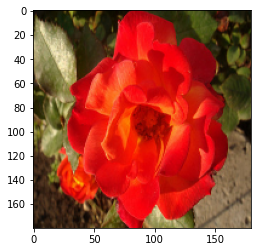

In [4]:
plt.imshow(image_df['image_data'][4279])

# Applying Gabor Filter

In [5]:
gabor_features=[]
g_kernel = cv2.getGaborKernel((13, 13), 4.0, 56.2, 10.0, 1, 0, ktype=cv2.CV_32F)
for image in image_df['image_data']:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gabor_features.append(gabor_feature)
image_df=image_df.assign(gabor = gabor_features)
image_df.head()

,image_data,class,category,gabor
0,"[[[45, 44, 39], [45, 44, 39], [48, 46, 41], [4...",dandelion,1,"[[[147, 115, 111], [153, 128, 120], [168, 157,..."
1,"[[[38, 30, 11], [35, 28, 9], [33, 27, 7], [27,...",dandelion,1,"[[[255, 255, 120], [255, 255, 106], [255, 215,..."
2,"[[[158, 162, 163], [162, 166, 169], [159, 160,...",dandelion,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[[212, 199, 0], [210, 195, 0], [210, 191, 0],...",dandelion,1,"[[[255, 255, 50], [255, 255, 42], [255, 255, 2..."
4,"[[[9, 12, 1], [9, 12, 1], [11, 14, 3], [11, 14...",dandelion,1,"[[[12, 32, 0], [17, 40, 0], [30, 59, 4], [45, ..."


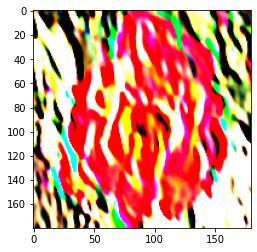

In [6]:
plt.imshow(image_df['gabor'][4279])

# Applying gaussian Filter

In [7]:
gauss_features=[]
for image in image_df['image_data']:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gauss_features.append(gauss_feature)

image_df=image_df.assign(gauss = gauss_features)
image_df.head()

,image_data,class,category,gabor,gauss
0,"[[[45, 44, 39], [45, 44, 39], [48, 46, 41], [4...",dandelion,1,"[[[147, 115, 111], [153, 128, 120], [168, 157,...","[[[47, 46, 43], [47, 47, 43], [48, 48, 45], [4..."
1,"[[[38, 30, 11], [35, 28, 9], [33, 27, 7], [27,...",dandelion,1,"[[[255, 255, 120], [255, 255, 106], [255, 215,...","[[[39, 31, 9], [38, 30, 9], [35, 28, 8], [30, ..."
2,"[[[158, 162, 163], [162, 166, 169], [159, 160,...",dandelion,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[161, 164, 167], [162, 164, 167], [162, 164,..."
3,"[[[212, 199, 0], [210, 195, 0], [210, 191, 0],...",dandelion,1,"[[[255, 255, 50], [255, 255, 42], [255, 255, 2...","[[[219, 201, 3], [219, 200, 3], [216, 196, 2],..."
4,"[[[9, 12, 1], [9, 12, 1], [11, 14, 3], [11, 14...",dandelion,1,"[[[12, 32, 0], [17, 40, 0], [30, 59, 4], [45, ...","[[[9, 11, 1], [10, 11, 2], [10, 12, 2], [11, 1..."


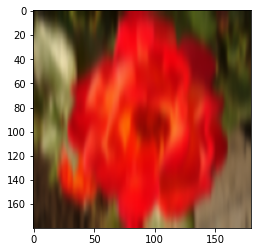

In [8]:
plt.imshow(image_df['gauss'][4279])

# Applying Sharpning Filter

In [9]:
sharp_features=[]

skernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

for image in image_df['image_data']:
    sharp_feature = cv2.filter2D(image, -1, skernel)
    sharp_features.append(sharp_feature)

image_df=image_df.assign(sharp = sharp_features)
image_df.head()

,image_data,class,category,gabor,gauss,sharp
0,"[[[45, 44, 39], [45, 44, 39], [48, 46, 41], [4...",dandelion,1,"[[[147, 115, 111], [153, 128, 120], [168, 157,...","[[[47, 46, 43], [47, 47, 43], [48, 48, 45], [4...","[[[41, 40, 29], [34, 34, 23], [55, 39, 31], [4..."
1,"[[[38, 30, 11], [35, 28, 9], [33, 27, 7], [27,...",dandelion,1,"[[[255, 255, 120], [255, 255, 106], [255, 215,...","[[[39, 31, 9], [38, 30, 9], [35, 28, 8], [30, ...","[[[52, 40, 21], [32, 25, 7], [45, 31, 0], [23,..."
2,"[[[158, 162, 163], [162, 166, 169], [159, 160,...",dandelion,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[161, 164, 167], [162, 164, 167], [162, 164,...","[[[120, 128, 105], [155, 170, 167], [118, 104,..."
3,"[[[212, 199, 0], [210, 195, 0], [210, 191, 0],...",dandelion,1,"[[[255, 255, 50], [255, 255, 42], [255, 255, 2...","[[[219, 201, 3], [219, 200, 3], [216, 196, 2],...","[[[186, 191, 0], [168, 161, 0], [197, 188, 0],..."
4,"[[[9, 12, 1], [9, 12, 1], [11, 14, 3], [11, 14...",dandelion,1,"[[[12, 32, 0], [17, 40, 0], [30, 59, 4], [45, ...","[[[9, 11, 1], [10, 11, 2], [10, 12, 2], [11, 1...","[[[9, 12, 1], [3, 6, 0], [17, 20, 9], [11, 14,..."


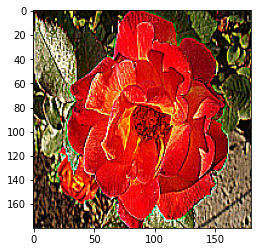

In [10]:
plt.imshow(image_df['sharp'][4279])

# Creating Training, Testing and Validation Datasets using Gabor Images

In [11]:
x, x_test, y, y_test = train_test_split(image_df['gabor'].to_list(),image_df['category'].to_list(),test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75)


x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_val=np.asarray(x_val)
y_val=np.asarray(y_val)

# Creating a CNN

2021-11-12 00:15:29.026054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 00:15:29.147759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 00:15:29.148577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 00:15:29.149797: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 1024)    28672     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 1024)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 512)       4719104   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 256)       1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       2

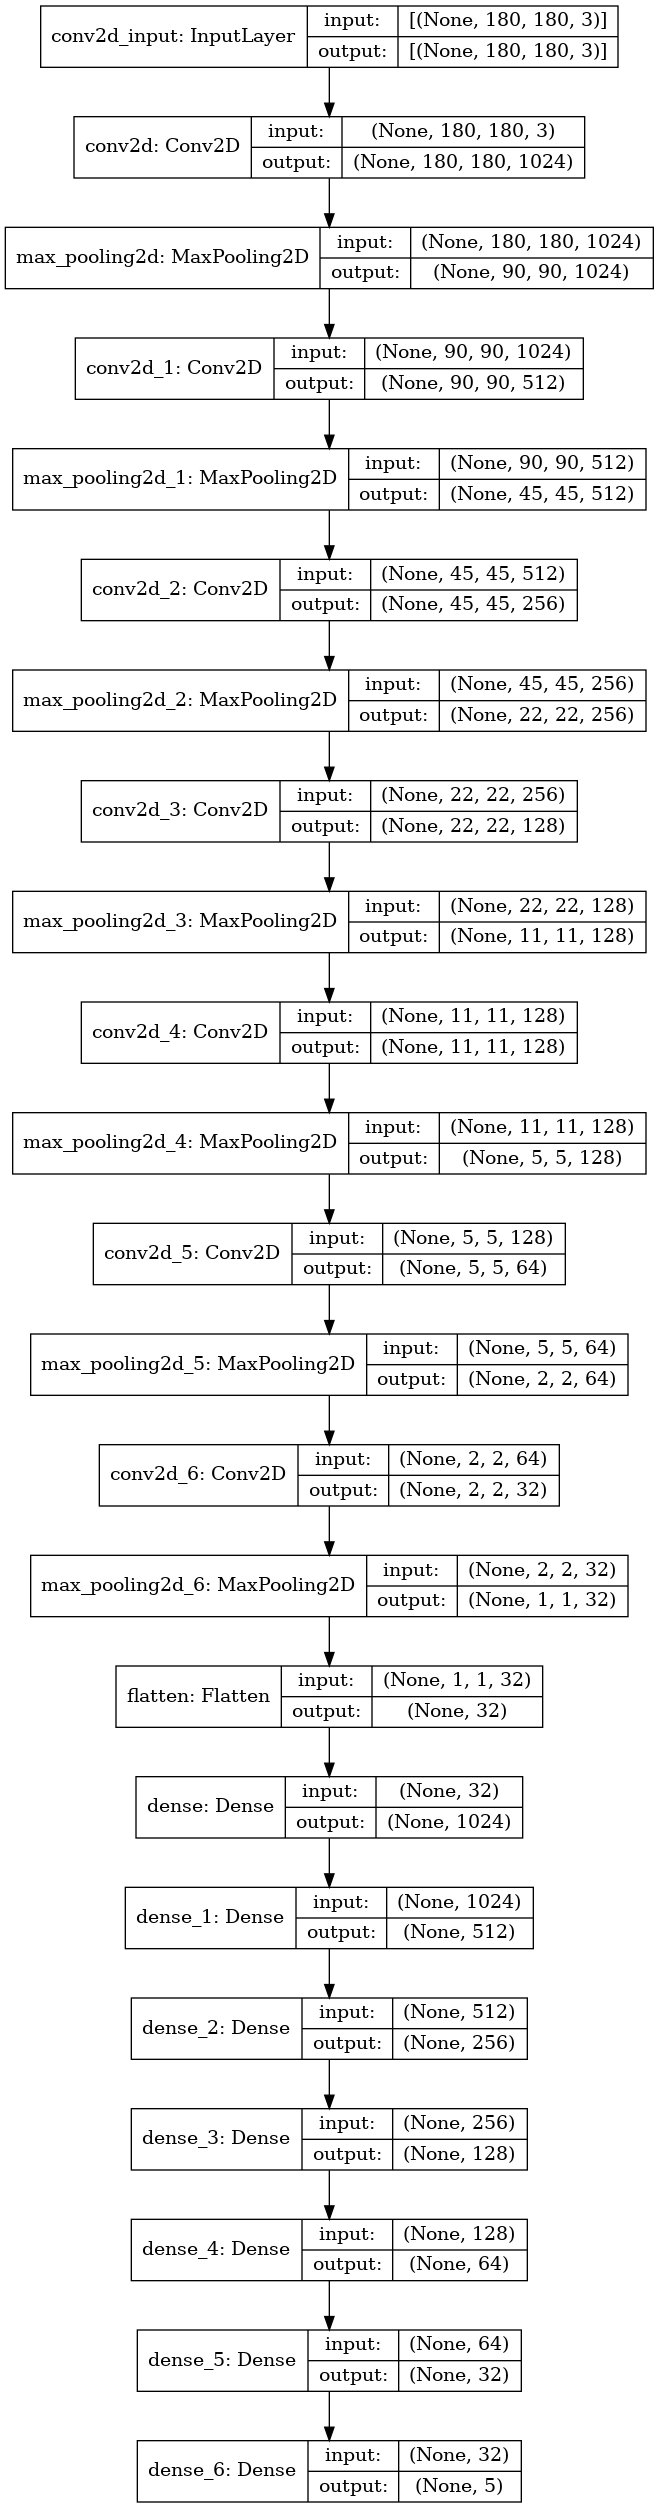

In [12]:
model = Sequential()
model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (180,180,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=1e-4)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['acc'])

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

# Creating Checkpoints

In [13]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 4, verbose = 1, factor = 0.3, min_lr = 0.0000001)
checkpoint = ModelCheckpoint('modelsharp.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)
callbacks = [reduce_learning_rate, checkpoint]

# Training Model

In [14]:
history = model.fit(x_train,y_train,
                    validation_data=(x_val,y_val),
                    epochs=50,
                    callbacks = callbacks,
                    batch_size=18)

2021-11-12 00:15:34.586225: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-11-12 00:15:36.235537: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


144/144 [==============================] - 61s 351ms/step - loss: 1.6198 - acc: 0.3009 - val_loss: 1.4347 - val_acc: 0.3727

Epoch 00001: val_acc improved from -inf to 0.37269, saving model to modelsharp.h5
Epoch 2/50
144/144 [==============================] - 47s 330ms/step - loss: 1.3689 - acc: 0.3874 - val_loss: 1.3032 - val_acc: 0.3611

Epoch 00002: val_acc did not improve from 0.37269
Epoch 3/50
144/144 [==============================] - 48s 330ms/step - loss: 1.3083 - acc: 0.4137 - val_loss: 1.4031 - val_acc: 0.3657

Epoch 00003: val_acc did not improve from 0.37269
Epoch 4/50
144/144 [==============================] - 48s 333ms/step - loss: 1.3063 - acc: 0.4040 - val_loss: 1.2880 - val_acc: 0.3773

Epoch 00004: val_acc improved from 0.37269 to 0.37731, saving model to modelsharp.h5
Epoch 5/50
144/144 [==============================] - 48s 333ms/step - loss: 1.2845 - acc: 0.4214 - val_loss: 1.3904 - val_acc: 0.3553

Epoch 00005: val_acc did not improve from 0.37731
Epoch 6/50
144

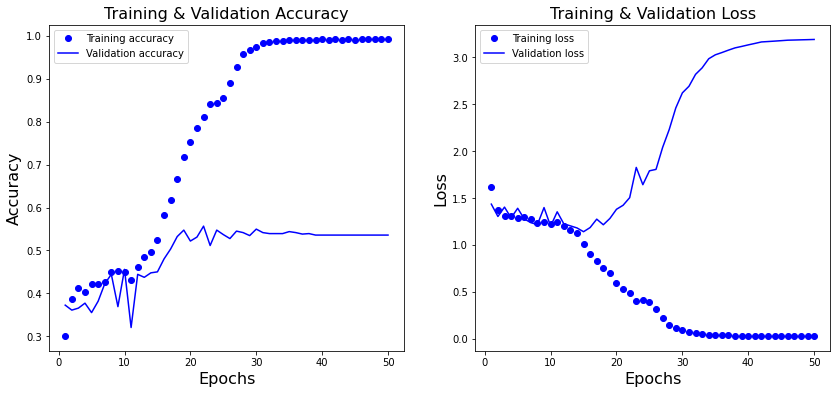

In [15]:
import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [16]:
y_pred= np.argmax(model.predict(x_test),axis=1)

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Testing Model

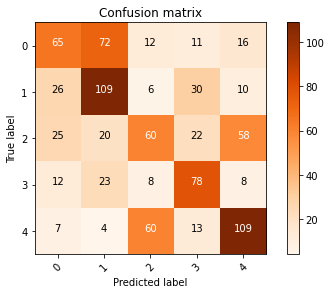

In [18]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(confusion_mtx, classes = range(5))

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)

test_loss, test_acc

27/27 [==============================] - 3s 120ms/step - loss: 3.5678 - acc: 0.4873


(3.5677831172943115, 0.48726850748062134)